<a href="https://colab.research.google.com/github/almonil/Elpegue/blob/Principal/3-mlproject-landinezsebastian-onofrethania-sabogaljhon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto




Se importan las librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.layers import Input, Dense
from keras.models import Model, load_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from keras.models import Model, load_model
import matplotlib.ticker as ticker


Se carga el archivo de datos a manejar en este caso Credit_data.csv

In [28]:
#Se carga el dataset a pandas dataframe
df= pd.read_csv('/content/credit_data.csv', delimiter=',')



Preprocesamiento de datos.

Aqui se ven ejemplos del dataframe y el uso de distintas librerias.

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


import numpy as np
import os
import sys


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit,train_test_split,StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
import joblib
from six.moves import urllib
import warnings
warnings.filterwarnings("ignore")
print(tf.__version__)


2.7.0


determinar el número de registros en el conjunto de datos

In [ ]:
print('El dataset contiene {0} filas and {1} columnas.'.format(df.shape[0], df.shape[1]))

El dataset contiene 49610 filas and 31 columnas.




Las características ya están escaladas y los nombres de las características no se muestran por razones de privacidad.


Ahora, veamos cuántas de las transacciones son fraudulentas.

loc localiza todos los datos por columna o declaración condicional


In [30]:
# Shuffle the data
df = df.sample(frac=1)

# Print the first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7773,10825,-0.969311,1.253038,0.763504,-0.440930,0.267168,-0.526955,1.004812,-0.084375,0.534284,-0.691453,1.757790,-1.851848,1.758176,1.881346,-1.350296,0.464585,-0.185960,0.459745,-0.495209,-0.305830,-0.060217,0.061753,-0.101820,-0.028199,-0.197618,0.058140,-0.465951,-0.207689,59.91,0.0
11482,19900,1.305394,-0.545034,0.719509,-0.367077,-0.917425,-0.103744,-0.855273,0.048929,0.627962,0.259423,2.385008,-2.221441,1.125090,1.286177,-1.644771,0.410873,1.537358,-1.465664,0.594955,-0.061337,-0.087025,0.077668,0.030646,0.191093,0.392170,-0.281742,-0.001753,-0.006358,5.00,0.0
978,741,-1.460494,1.072256,1.525621,0.122964,-0.874790,-0.382503,0.025338,0.353055,0.923318,0.274842,-1.119679,-0.395008,-1.069482,-0.307002,-0.003806,-0.099091,-0.004277,0.099417,0.040700,0.194302,0.037687,0.534206,-0.218095,0.429192,-0.068667,0.428325,0.159005,0.040868,29.99,0.0
2530,2095,-0.424293,0.677811,1.212060,-2.007860,0.205564,-1.219779,1.107751,-0.329355,0.797146,-1.196337,0.183773,0.453661,-0.225205,0.114045,1.104132,-0.971886,-0.177241,-0.521472,-0.583184,-0.007850,0.110314,0.734821,-0.226985,0.407778,-0.040911,-0.830208,0.256227,-0.013636,1.00,0.0
10436,16928,-1.617922,-0.782478,2.017603,-2.010349,-0.154127,-0.552193,0.161447,-0.069064,2.576103,-2.276675,0.731332,-1.381017,2.732492,0.822400,0.093131,-0.548719,0.550328,-0.008697,-0.528828,-0.014350,0.106439,0.730094,0.102891,0.118093,0.232499,-0.063026,-0.026285,0.190787,144.00,0.0


In [31]:
df['Class'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15936 entries, 7773 to 4983
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15936 non-null  int64  
 1   V1      15936 non-null  float64
 2   V2      15936 non-null  float64
 3   V3      15936 non-null  float64
 4   V4      15936 non-null  float64
 5   V5      15936 non-null  float64
 6   V6      15936 non-null  float64
 7   V7      15936 non-null  float64
 8   V8      15936 non-null  float64
 9   V9      15936 non-null  float64
 10  V10     15936 non-null  float64
 11  V11     15936 non-null  float64
 12  V12     15936 non-null  float64
 13  V13     15936 non-null  float64
 14  V14     15936 non-null  float64
 15  V15     15936 non-null  float64
 16  V16     15936 non-null  float64
 17  V17     15936 non-null  float64
 18  V18     15936 non-null  float64
 19  V19     15936 non-null  float64
 20  V20     15936 non-null  float64
 21  V21     15936 non-null  float64
 

Como podemos ver, sólo hay 492 casos de fraude entre 284807 muestras

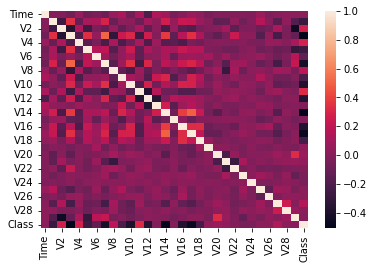

In [32]:
sns.heatmap(df.corr())
plt.show()

Dos columnas Time y Amount con sus datos de precision no normalizadas


In [33]:
#resumen numérico -> sólo columnas de interés no anonimizadas
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,15936.000,15935.000
mean,12121.218,66.390
std,8982.284,189.355
min,0.000,0.000
25%,3633.500,5.490
50%,10980.000,15.950
75%,20621.500,53.890
max,27371.000,7712.430


Para evaluar nuestro algoritmo de aprendizaje, tomamos algunos datos etiquetados, clasificados en ejemplos anómalos y no anómalos.

Entre esos datos, tomamos una gran proporción de datos buenos y no anómalos para el conjunto de entrenamiento sobre el que entrenar df(x).

A continuación, tome una proporción menor de ejemplos mixtos anómalos y no anómalos (normalmente tendrá muchos más ejemplos no anómalos) para sus conjuntos de validación cruzada y de prueba.



In [36]:
#spliting only non-anomolous examples
credit_train,credit_testsplit = train_test_split(df[df['Class'] == 0],test_size=0.1,random_state=42)
credit_test,credit_val = train_test_split(credit_testsplit,test_size=0.5,random_state=42)
print("Train size {} \n Validation Size {}\n Test Size {}".format(
    credit_train.shape,credit_val.shape,credit_test.shape
))

Train size (14275, 31) 
 Validation Size (794, 31)
 Test Size (793, 31)


Entrenar y buscar las anomalias por medio del test 




In [38]:
credit_test_anomolous,credit_val_anomolous = train_test_split(df[df['Class'] == 1],test_size=0.5,random_state=42)

credit_test = credit_test.append(credit_test_anomolous)
credit_val = credit_val.append(credit_val_anomolous)

print("Train size {} \n Validation Size {}\n Test Size {}".format(
    credit_train.shape,credit_val.shape,credit_test.shape
))

Train size (14275, 31) 
 Validation Size (831, 31)
 Test Size (829, 31)


In [39]:
for index,(name,data) in enumerate(zip(["train","validation","test"],[credit_train,credit_val,credit_test])):
    print("{} set : \n{}".format(name,data['Class'].value_counts()))
    print("-"*10)

train set : 
0.0    14275
Name: Class, dtype: int64
----------
validation set : 
0.0    794
1.0     37
Name: Class, dtype: int64
----------
test set : 
0.0    793
1.0     36
Name: Class, dtype: int64
----------


In [47]:
X_train,X_val,X_test,y_train,y_val,y_test = credit_train.drop('Class',axis=1),credit_val.drop('Class',axis=1),credit_test.drop('Class',axis=1),credit_train['Class'].copy(),credit_val['Class'].copy(),credit_test['Class'].copy()

X_train.shape

(14275, 30)

Ahora nuestro conjunto de datos está listo y dividido entre los conjuntos de entrenamiento, validación y prueba. Ahora encontraremos un número correcto de clusters en el modelo GaussianMixture utilizando las curvas BIC y AIC.


Un método para hacer clustering basado en el aprendizaje profundo es aprender buenas representaciones de características y luego ejecutar cualquier algoritmo de clustering clásico en las representaciones aprendidas. 

In [44]:
bic = []
aic = []
for cluster in range(2,50):
    gm = GaussianMixture(n_components=cluster,verbose=10).fit(X_train)
    bic.append(gm.bic(X_train))
    aic.append(gm.aic(X_train))


Initialization 0
  Iteration 10	 time lapse 0.29671s	 ll change 0.73884
  Iteration 20	 time lapse 0.24717s	 ll change 0.13019
  Iteration 30	 time lapse 0.24327s	 ll change 0.05373
  Iteration 40	 time lapse 0.27278s	 ll change 0.11666
  Iteration 50	 time lapse 0.26464s	 ll change 0.00059
Initialization converged: True	 time lapse 1.32544s	 ll -21.06624
Initialization 0
  Iteration 10	 time lapse 0.43686s	 ll change 0.31961
  Iteration 20	 time lapse 0.40775s	 ll change 0.04433
  Iteration 30	 time lapse 0.38725s	 ll change 0.01507
  Iteration 40	 time lapse 0.38520s	 ll change 0.00356
  Iteration 50	 time lapse 0.38811s	 ll change 0.02022
  Iteration 60	 time lapse 0.37303s	 ll change 0.57118
Initialization converged: True	 time lapse 2.64609s	 ll -15.32008
Initialization 0
  Iteration 10	 time lapse 0.57030s	 ll change 0.72417
  Iteration 20	 time lapse 0.50504s	 ll change 0.00495
Initialization converged: True	 time lapse 1.22119s	 ll -12.66219
Initialization 0
  Iteration 10	 tim

El clustering o análisis de cluster es una técnica de aprendizaje automático que agrupa el conjunto de datos sin etiquetar. Se puede definir como "Una forma de agrupar los puntos de datos en diferentes clusters, que consisten en puntos de datos similares.

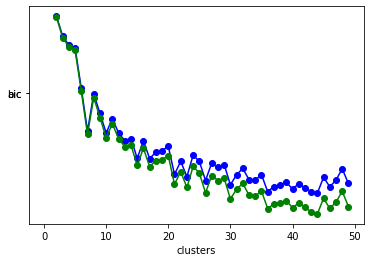

In [45]:
plt.plot(range(2,50),bic,"bo-","bic")
plt.plot(range(2,50),aic,"go-","aic")
plt.xlabel("clusters")
plt.show()

In [46]:
np.argmin(bic)

42

Tenemos el valor mínimo en 45, vamos a explorar algunos clusters más, para confirmar

In [48]:
gauss = []
for cluster in range(50,60):
    gm = GaussianMixture(n_components=cluster,verbose=10).fit(X_train)
    bic.append(gm.bic(X_train))
    aic.append(gm.aic(X_train))
    gauss.append(gm)

Initialization 0
  Iteration 10	 time lapse 6.77485s	 ll change 1.13689
  Iteration 20	 time lapse 5.70619s	 ll change 0.24235
  Iteration 30	 time lapse 5.62522s	 ll change 0.02670
Initialization converged: True	 time lapse 23.24692s	 ll 34.64813
Initialization 0
  Iteration 10	 time lapse 6.97626s	 ll change 1.51703
  Iteration 20	 time lapse 6.02231s	 ll change 0.09699
  Iteration 30	 time lapse 5.89257s	 ll change 0.00108
Initialization converged: True	 time lapse 19.50632s	 ll 36.61353
Initialization 0
  Iteration 10	 time lapse 6.80368s	 ll change 2.80941
  Iteration 20	 time lapse 5.80380s	 ll change 0.43313
  Iteration 30	 time lapse 5.77970s	 ll change 0.36541
Initialization converged: True	 time lapse 21.84699s	 ll 34.74559
Initialization 0
  Iteration 10	 time lapse 6.61188s	 ll change 1.54595
  Iteration 20	 time lapse 5.70068s	 ll change 0.05727
  Iteration 30	 time lapse 5.68805s	 ll change 0.05612
Initialization converged: True	 time lapse 21.41337s	 ll 36.55738
Initiali

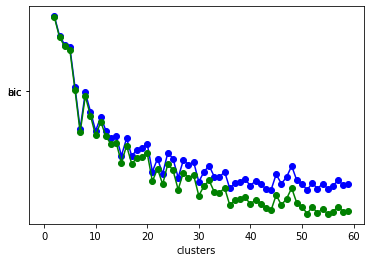

In [49]:
plt.plot(range(2,60),bic,"bo-","bic")
plt.plot(range(2,60),aic,"go-","aic")
plt.xlabel("clusters")
plt.show()